In [13]:
%pip install matplotlib pandas numpy seaborn

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    ----------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import csv
import pandas as pd
import ast
import seaborn as sns

In [9]:
json_file = 'eve.json'
csv_file = 'output.csv'

# Read JSON objects line by line (NDJSON)
with open(json_file, 'r') as f:
    data = [json.loads(line) for line in f if line.strip()]

# Collect all unique keys from all JSON objects
all_keys = set()
for entry in data:
    all_keys.update(entry.keys())

# Convert set to list and sort (optional)
fieldnames = sorted(all_keys)

# Write to CSV
with open(csv_file, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

ff02:0000:0000:0000:0000:0000:0000:0016: 11
172.18.0.2: 4
172.18.0.3: 4
172.18.0.5: 1
172.18.0.4: 4


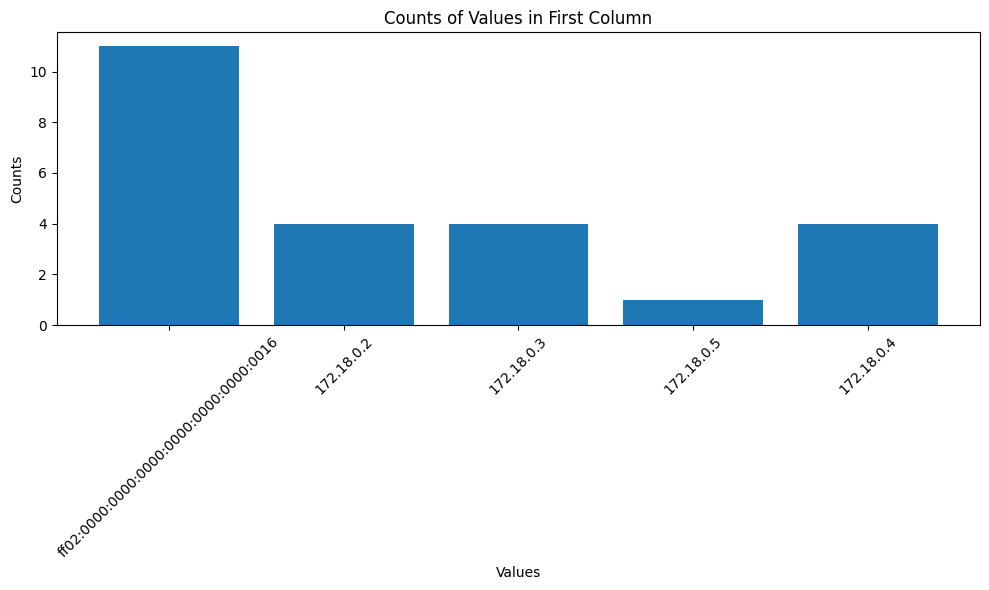

<Figure size 640x480 with 0 Axes>

In [ ]:
# Read the CSV file and count occurrences of each value in the first column
with open('output.csv', 'r', encoding='utf-8') as csv_file:
    reader = csv.reader(csv_file)
    header = next(reader)  # Skip the header
    first_column_values = [row[0] for row in reader]
    # Count occurrences of each value
    value_counts = Counter(first_column_values)
    # Create a dictionary to store the counts
    counts_dict = defaultdict(int)
    for value in first_column_values:
        counts_dict[value] += 1
# Print the counts
for value, count in counts_dict.items():
    print(f"{value}: {count}")
# Plotting the counts
plt.figure(figsize=(10, 6))
plt.bar(counts_dict.keys(), counts_dict.values())
plt.xlabel('Values')
plt.ylabel('Counts')    
plt.title('Counts of Values in First Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Save the plot as an image
plt.savefig('value_counts_plot.png')

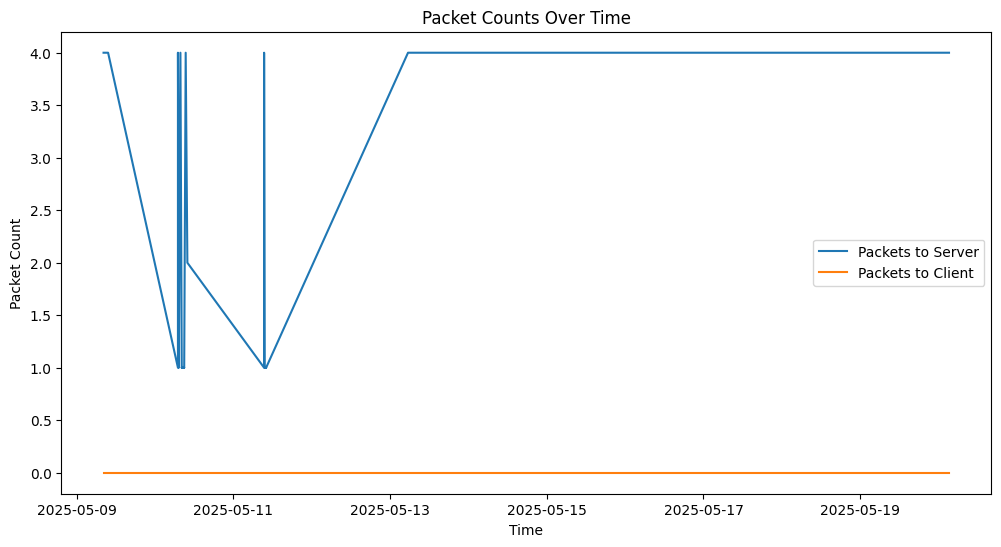

<Figure size 640x480 with 0 Axes>

In [17]:
# Load CSV
df = pd.read_csv('output.csv')

# Parse the flow dictionary column
df['flow_dict'] = df['flow'].apply(ast.literal_eval)

# Extract timestamps and packet counts
df['start_time'] = pd.to_datetime(df['flow_dict'].apply(lambda x: x['start']))
df['pkts_toserver'] = df['flow_dict'].apply(lambda x: x['pkts_toserver'])
df['pkts_toclient'] = df['flow_dict'].apply(lambda x: x['pkts_toclient'])

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['start_time'], df['pkts_toserver'], label='Packets to Server')
plt.plot(df['start_time'], df['pkts_toclient'], label='Packets to Client')
plt.xlabel('Time')
plt.ylabel('Packet Count')
plt.title('Packet Counts Over Time')
plt.legend()
plt.show()
# Save the plot as an image
plt.savefig('packet_counts_over_time.png')


In [27]:
print(df.columns)

Index(['dest_ip', 'dest_port', 'event_type', 'flow', 'flow_id', 'icmp_code',
       'icmp_type', 'in_iface', 'proto', 'src_ip', 'src_port', 'tcp',
       'timestamp', 'flow_dict', 'start_time', 'pkts_toserver',
       'pkts_toclient', 'bytes_toserver', 'bytes_toclient'],
      dtype='object')


In [31]:
sample_tcp = ast.literal_eval(df['tcp'].dropna().iloc[0])
print(sample_tcp)

{'tcp_flags': '02', 'tcp_flags_ts': '02', 'tcp_flags_tc': '00', 'syn': True, 'state': 'syn_sent', 'ts_max_regions': 1, 'tc_max_regions': 1}


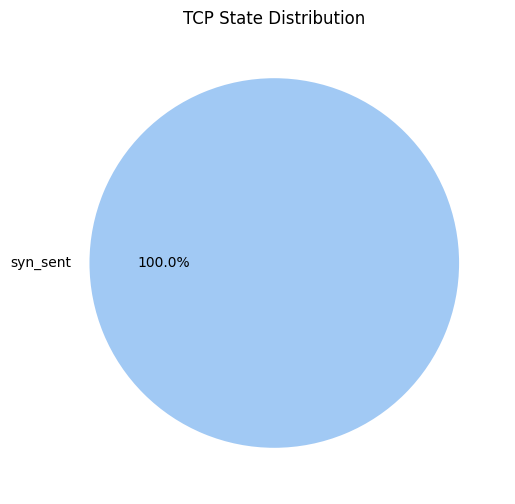

<Figure size 640x480 with 0 Axes>

In [34]:
# Safely convert only string entries in 'tcp' column to dictionaries
def safe_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else None
    except Exception:
        return None

df['tcp_dict'] = df['tcp'].apply(safe_eval)

# Now safely extract 'state' from valid dictionaries
df['tcp_state'] = df['tcp_dict'].apply(lambda x: x.get('state') if isinstance(x, dict) else None)

# Count and plot
tcp_state_counts = df['tcp_state'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(tcp_state_counts.values, labels=tcp_state_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('TCP State Distribution')
plt.show()
# Save the plot as an image
plt.savefig('tcp_state_distribution.png')

C:\Users\pasan\AppData\Local\Temp\ipykernel_8684\1182463247.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




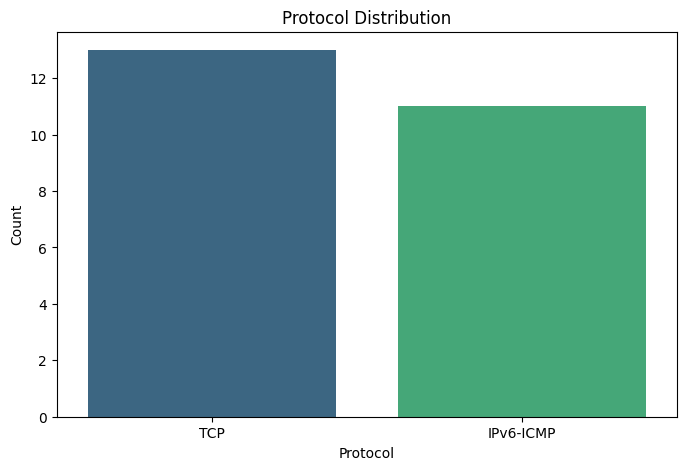

<Figure size 640x480 with 0 Axes>

In [36]:
proto_counts = df['proto'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=proto_counts.index, y=proto_counts.values, palette='viridis')
plt.title('Protocol Distribution')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()
# Save the plot as an image
plt.savefig('protocol_distribution.png')


C:\Users\pasan\AppData\Local\Temp\ipykernel_8684\4047010483.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




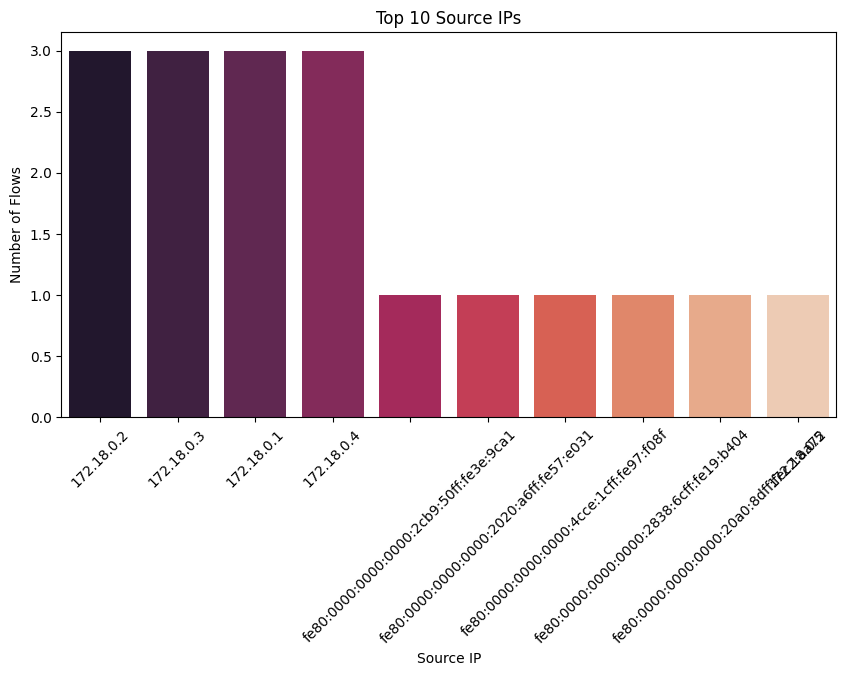

<Figure size 640x480 with 0 Axes>

In [38]:
top_src_ips = df['src_ip'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_src_ips.index, y=top_src_ips.values, palette='rocket')
plt.title('Top 10 Source IPs')
plt.xlabel('Source IP')
plt.ylabel('Number of Flows')
plt.xticks(rotation=45)
plt.show()
# Save the plot as an image
plt.savefig('top_src_ips.png')


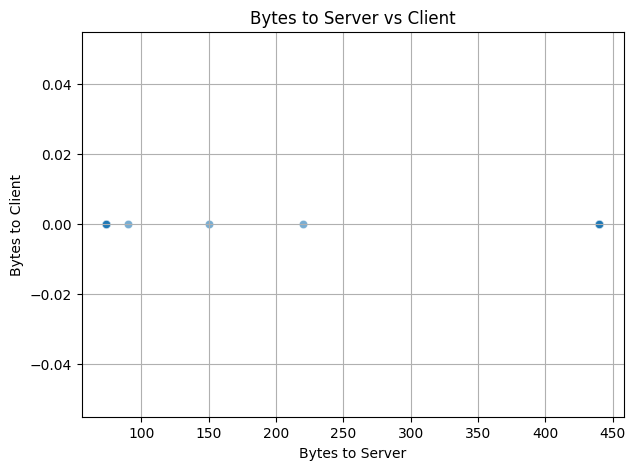

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='bytes_toserver', y='bytes_toclient', alpha=0.6)
plt.title('Bytes to Server vs Client')
plt.xlabel('Bytes to Server')
plt.ylabel('Bytes to Client')
plt.grid(True)
plt.show()
# Save the plot as an image
plt.savefig('bytes_to_server_vs_client.png')

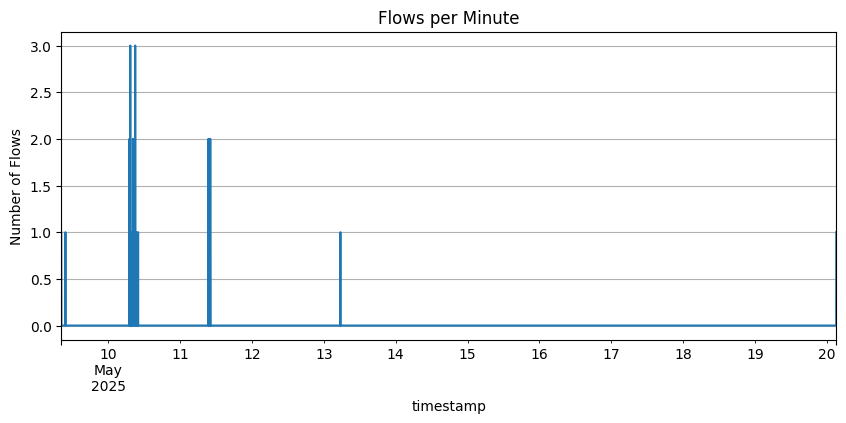

<Figure size 640x480 with 0 Axes>

In [41]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.set_index('timestamp', inplace=True)
df.resample('1Min')['flow_id'].count().plot(figsize=(10,4), title='Flows per Minute')
plt.ylabel('Number of Flows')
plt.grid(True)
plt.show()
# Save the plot as an image
plt.savefig('flows_per_minute.png')

C:\Users\pasan\AppData\Local\Temp\ipykernel_8684\3667731290.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




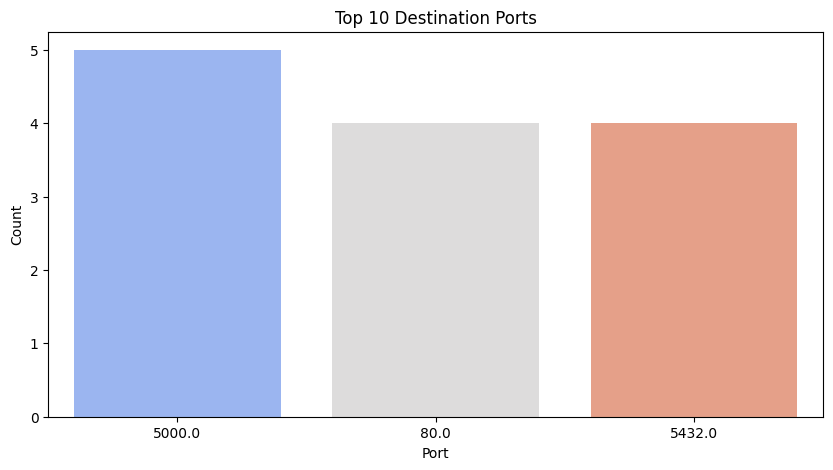

<Figure size 640x480 with 0 Axes>

In [42]:
top_ports = df['dest_port'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_ports.index.astype(str), y=top_ports.values, palette='coolwarm')
plt.title('Top 10 Destination Ports')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()  
# Save the plot as an image
plt.savefig('top_destination_ports.png')

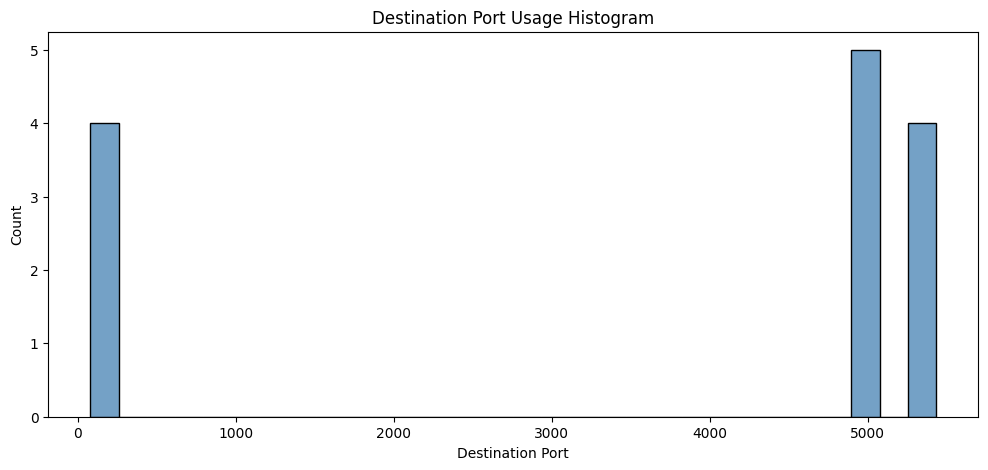

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(12,5))
sns.histplot(df['dest_port'], bins=30, kde=False, color='steelblue')
plt.xlabel('Destination Port')
plt.ylabel('Count')
plt.title('Destination Port Usage Histogram')
plt.show()
# Save the plot as an image
plt.savefig('dest_port_histogram.png')

In [25]:
!pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import plotly.express as px

fig = px.line(df, x='start_time', y=['pkts_toserver', 'pkts_toclient'], title='Packets Over Time')
fig.show()
# Save the plot as an image
fig.write_image('packets_over_time_plotly.png')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed